In [17]:
import sys
import os
import shutil
import json
import numpy as np

current_directory = os.getcwd()
path_components = current_directory.split(os.path.sep)
new_directory = os.path.sep.join(path_components[:-2])
sys.path.append(new_directory)

simulation_name = path_components[-1]
results_path = current_directory
main_path = new_directory

shutil.copyfile(os.path.join(results_path,simulation_name+'.py'), os.path.join(main_path,'S_temp.py'))
print(main_path)
print(results_path)

/home/martinachondo/PINN/code
/home/martinachondo/PINN/code/results/Main


## Post processing framework

#### Import the simulation file

In [6]:
folder_name = 'S_temp'
folder_path = os.path.join(main_path,'results',folder_name)

from S_temp import simulation

mesh_properties = {'hmin_interior': 0.01,
            'hmin_exterior': 0.5,
            'density_mol': 40,
            'density_border': 4,
            'dx_experimental': 2,
            'N_pq': 100,
            'G_sigma': 0.04,
            'mesh_generator': 'msms',
            'dR_exterior': 6
                }
for key,value in mesh_properties.items():
    simulation.mesh_properties[key] = value
print(simulation.domain_properties)
simulation.create_simulation()

{'molecule': 'born_ion', 'epsilon_1': 1, 'epsilon_2': 80, 'kappa': 0.125, 'T': 300}
/home/martinachondo/PINN/code/Mesh/Mesh_softwares/MSMS/msms -if /home/martinachondo/PINN/code/Molecules/born_ion/born_ion.xyzr -of /home/martinachondo/PINN/code/Molecules/Saved_meshes/Temp/born_ion_d40 -p 1.4 -d 40 -no_header
MSMS 2.6.1 started on tulio
Copyright M.F. Sanner (1994)
Compilation flags -O2 -DVERBOSE -DTIMING
Atom 2 ignored, radius = 0.010000
INPUT  /home/martinachondo/PINN/code/Molecules/born_ion/born_ion.xyzr 1 spheres 0 collision only, radii  1.000 to  1.000
PARAM  Probe_radius  1.400 density 40.000 hdensity  3.000
REDUCED SURFACE ...
    1 free vertex (vertices) found
    RS component  #faces  #edges #free_edges  #vertices   genus
         0           0        1          0          1      1
    Time Reduced Surface real: 0.00 user: 0.00 sys: 0.00
ANALYTICAL SOLVENT EXCLUDED SURFACE...
    Component   0
        Time Surface real: 0.00 user: 0.00 sys: 0.00
    SES comp.  #fac.  #edg. #s_e

#### Load the model and create the postprocessing object

In [7]:
Iter = 2
simulation.load_model(folder_path,results_path,Iter, save=False)
Post = simulation.Post

OpenMesh not available
No module named 'openmesh'


#### Using the postprocessing object

In [8]:
df = Post.save_values_file(save=False) 
print(json.dumps(df, indent=4))

{
    "Gsolv_value": "0.000",
    "L2_continuity_u": "5.333e-01",
    "L2_continuity_du": "2.349e-01",
    "Loss_XPINN": "2.288e+04",
    "Loss_NN1": "2.288e+04",
    "Loss_NN2": "6.228e-01",
    "L2_analytic": "2.618e+02"
}


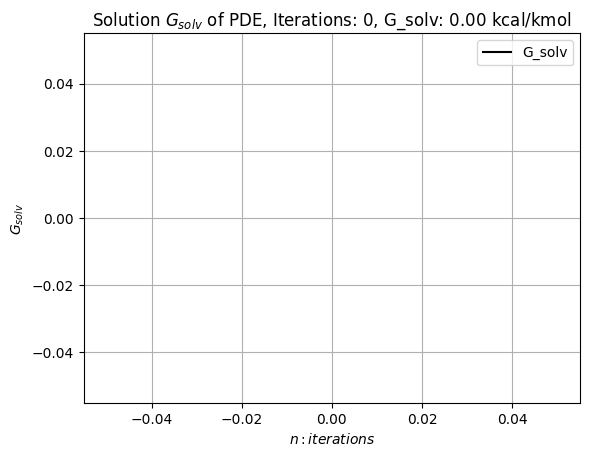

In [9]:
Post.plot_G_solv_history()

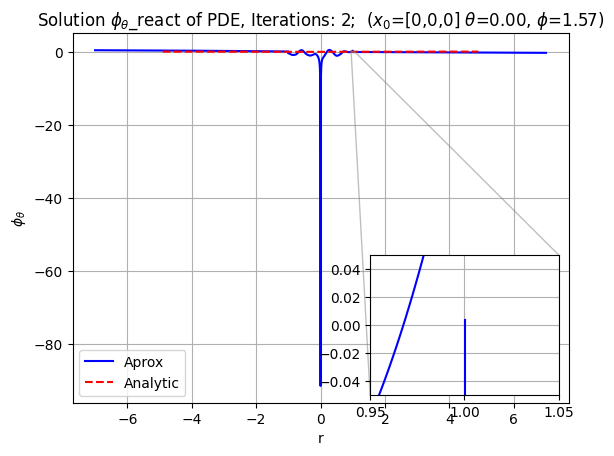

In [10]:
Post.plot_aprox_analytic(N=8000,zoom=True, lims_zoom=[[0.95,1.05],None], value='react')

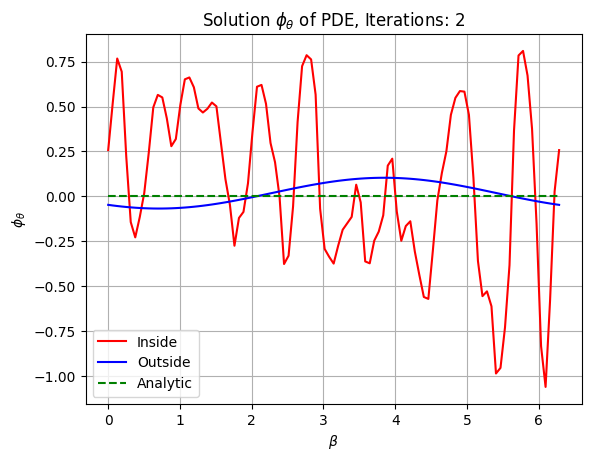

In [11]:
Post.plot_line_interface()

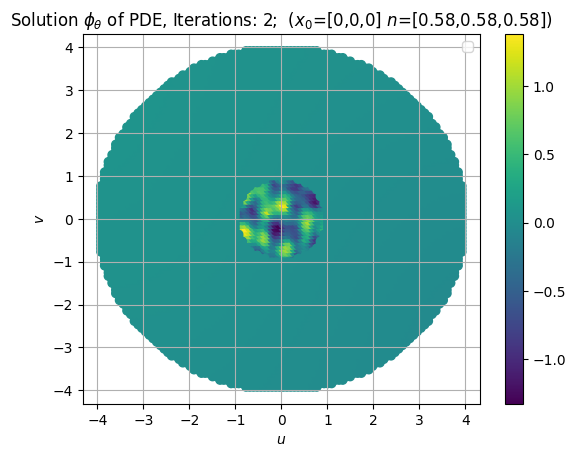

In [15]:
Post.plot_phi_contour(n=np.array([1,1,1]))